<a href="https://colab.research.google.com/github/berberberk/timl-fs-2024/blob/main/TIML7_Dimensionality_Reduction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from sklearn.datasets import fetch_california_housing
import pandas as pd
import numpy as np

# Загрузка данных California Housing
data = fetch_california_housing()
X = pd.DataFrame(data.data, columns=data.feature_names)
y = data.target

print("Размеры данных:", X.shape)
print("Признаки данных:", X.columns)


Размеры данных: (20640, 8)
Признаки данных: Index(['MedInc', 'HouseAge', 'AveRooms', 'AveBedrms', 'Population', 'AveOccup',
       'Latitude', 'Longitude'],
      dtype='object')


In [2]:
import statsmodels.api as sm
from sklearn.linear_model import LinearRegression
from sklearn.feature_selection import RFE

# Линейная регрессия для оценки значимости (p-values)
X_const = sm.add_constant(X)
model = sm.OLS(y, X_const).fit()
print("P-values признаков:\n", model.pvalues)

# Жадный алгоритм (RFE)
lin_reg = LinearRegression()
rfe = RFE(estimator=lin_reg, n_features_to_select=5)  # Выберем 5 наиболее значимых признаков
rfe.fit(X, y)
selected_features_rfe = X.columns[rfe.support_]
print("Выбранные признаки с RFE:", selected_features_rfe)


P-values признаков:
 const          0.000000e+00
MedInc         0.000000e+00
HouseAge       3.505485e-98
AveRooms       1.026311e-73
AveBedrms     6.725726e-115
Population     4.024472e-01
AveOccup       8.303694e-15
Latitude       0.000000e+00
Longitude      0.000000e+00
dtype: float64
Выбранные признаки с RFE: Index(['MedInc', 'AveRooms', 'AveBedrms', 'Latitude', 'Longitude'], dtype='object')


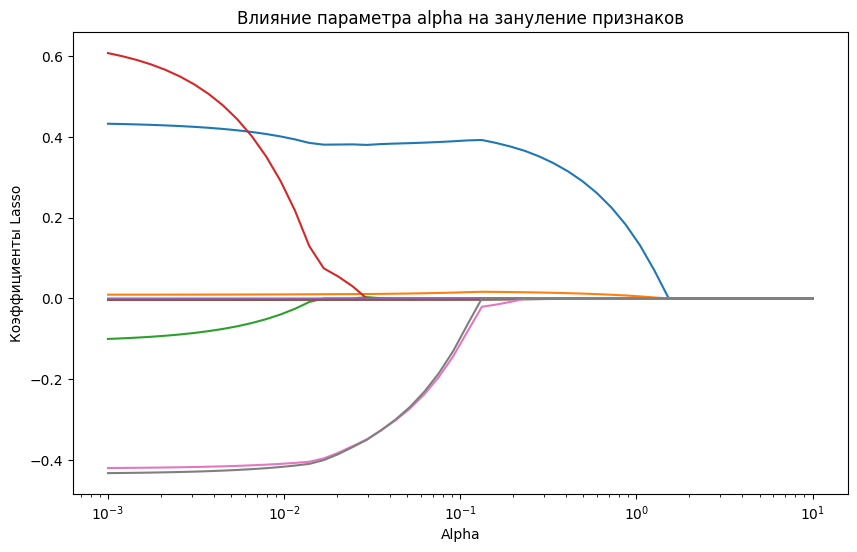

In [3]:
from sklearn.linear_model import Lasso
import matplotlib.pyplot as plt

alphas = np.logspace(-3, 1, 50)  # Значения alpha от 0.001 до 10
coef_list = []

# Обучение моделей Lasso с разными alpha
for alpha in alphas:
    lasso = Lasso(alpha=alpha)
    lasso.fit(X, y)
    coef_list.append(lasso.coef_)

# Визуализация изменения коэффициентов
plt.figure(figsize=(10, 6))
plt.plot(alphas, coef_list)
plt.xscale("log")
plt.xlabel("Alpha")
plt.ylabel("Коэффициенты Lasso")
plt.title("Влияние параметра alpha на зануление признаков")
plt.show()


In [4]:
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.metrics import mean_squared_error, r2_score

# Случайный лес
rf = RandomForestRegressor(n_estimators=100, random_state=42)
rf.fit(X, y)
y_pred_rf = rf.predict(X)

# Градиентный бустинг
gb = GradientBoostingRegressor(n_estimators=100, random_state=42)
gb.fit(X, y)
y_pred_gb = gb.predict(X)

# Метрики качества моделей
def print_metrics(y_true, y_pred, model_name):
    print(f"{model_name}:\nMSE: {mean_squared_error(y_true, y_pred):.4f}, R2: {r2_score(y_true, y_pred):.4f}\n")

print_metrics(y, y_pred_rf, "Random Forest")
print_metrics(y, y_pred_gb, "Gradient Boosting")


Random Forest:
MSE: 0.0347, R2: 0.9740

Gradient Boosting:
MSE: 0.2619, R2: 0.8033



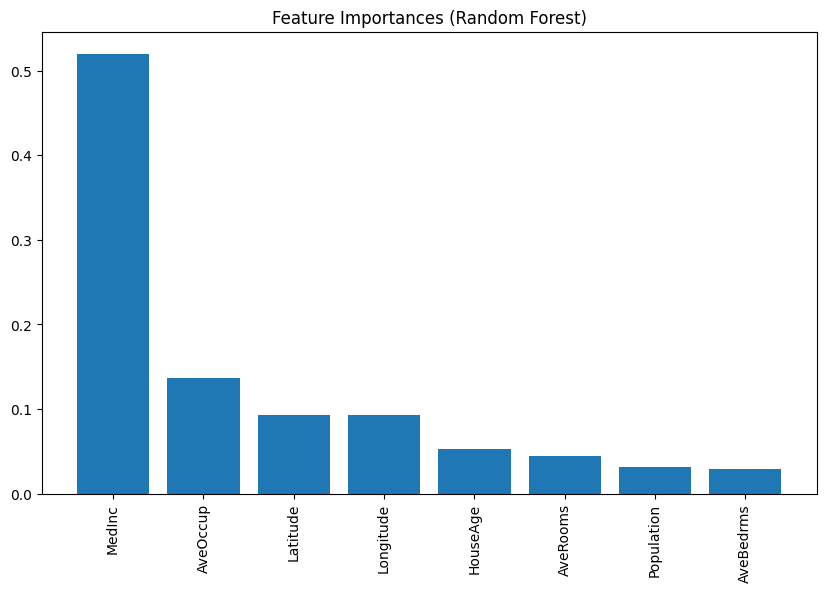

 98%|===================| 20298/20640 [00:31<00:00]       

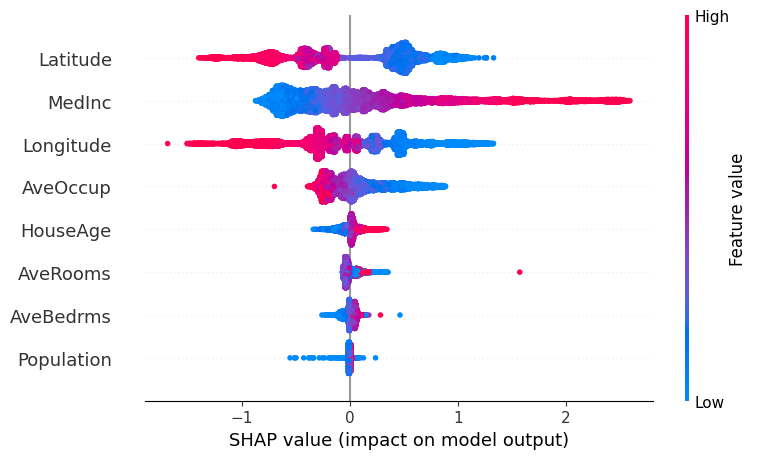

In [5]:
import shap

# Значимость признаков для случайного леса
importances_rf = rf.feature_importances_
indices_rf = np.argsort(importances_rf)[::-1]

plt.figure(figsize=(10, 6))
plt.bar(range(X.shape[1]), importances_rf[indices_rf], align="center")
plt.xticks(range(X.shape[1]), X.columns[indices_rf], rotation=90)
plt.title("Feature Importances (Random Forest)")
plt.show()

# SHAP для градиентного бустинга
explainer = shap.Explainer(gb, X)
shap_values = explainer(X)

shap.summary_plot(shap_values, X)


In [6]:
# Сравнение на отобранных признаках
X_selected = X[selected_features_rfe]

rf.fit(X_selected, y)
gb.fit(X_selected, y)

y_pred_rf_selected = rf.predict(X_selected)
y_pred_gb_selected = gb.predict(X_selected)

print("Метрики на отобранных признаках:")
print_metrics(y, y_pred_rf_selected, "Random Forest (Selected Features)")
print_metrics(y, y_pred_gb_selected, "Gradient Boosting (Selected Features)")


Метрики на отобранных признаках:
Random Forest (Selected Features):
MSE: 0.0316, R2: 0.9763

Gradient Boosting (Selected Features):
MSE: 0.3073, R2: 0.7692



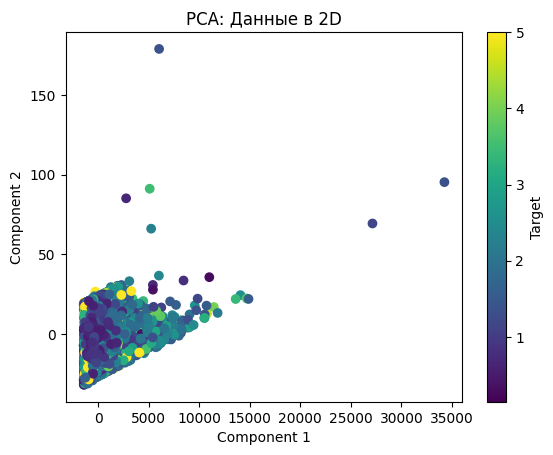

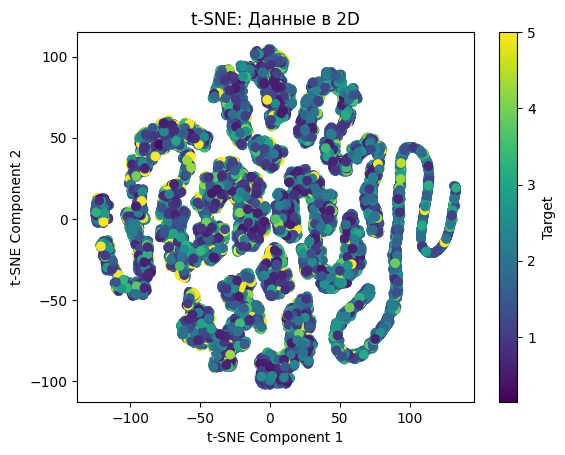

In [7]:
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE

# PCA
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X)

plt.scatter(X_pca[:, 0], X_pca[:, 1], c=y, cmap="viridis")
plt.title("PCA: Данные в 2D")
plt.xlabel("Component 1")
plt.ylabel("Component 2")
plt.colorbar(label="Target")
plt.show()

# t-SNE
tsne = TSNE(n_components=2, random_state=42)
X_tsne = tsne.fit_transform(X)

plt.scatter(X_tsne[:, 0], X_tsne[:, 1], c=y, cmap="viridis")
plt.title("t-SNE: Данные в 2D")
plt.xlabel("t-SNE Component 1")
plt.ylabel("t-SNE Component 2")
plt.colorbar(label="Target")
plt.show()
